## Student Info

* Student name 1: Vo Van Hoang
* Student ID 1: 20127028


* Student name 2: Ngo Van Trung Nguyen
* Student ID 2: 20127054

## Project Info

This project aims to get hands-on experience in implementing some Classification and clustering algorithms taught in Data Mining and Applications course.

There are 2 exercises in this project:
* Binary classification using Decision Tree (ID3 algorithm)
* Data clustering with K-means clustering

## Instructions

### How to finish

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```Your answer here``` in text cells.


<font color='red'>**NOTE:**</font>

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

- The given test cases (if any) are used to only assist your code debugging / unit testing. Passing these test cases does not necessarily mean you will get the maximum point for the exercise.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1_ID2.ipynb` (e.g. `19123_19456.ipynb`) and submit on Moodle.

<font color=red>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points!!!</font>


## Exercise 1: Classification (6 points)

### Requirements

You will need to implement Decision Tree algorithm (ID3) in Python language.

**Description**:

- In this exercise, you only need to build a decision tree model using categorical attributes (no need to handle numerical attributes). You may transform numerical attributes into categorical before feeding into classification model.

- A sample belongs to either one of the given labels (binary classification).

- Dataset: [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) and [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing)


You will need to implement `load_data` function and DecisionTree class with the following methods:

- ```fit```: build tree from given dataset, using ID3 algorithm

- ```predict```: make predictions on new data points using the trained decision tree

- ```visualize```: plot trained decision tree from training dataset. You may choose how to visualize the trained model, as long as the tree structure of the model is clarified (you may use available visualization packages such as ```tree``` or ```graphviz```, or implement the visualization code yourself). For example, a simple representation of a decision tree built from [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset may look like:


```
outlook = sunny
|  humidity = high: no
|  humidity = normal: yes
outlook = overcast: yes
outlook = rainy
|  windy = TRUE: no
|  windy = FALSE: yes
```

**Note**:

- For [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset, you can use all samples for training without spliting into train and test set. For [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing) dataset, you may need to split into train/test with the ratio of 80/20 (use ```sklearn.model_selection.train_test_split``` with ```random_state=520``` for reproducibility)

- ```load_data``` function and ```DecisionTree``` class must be implemented once only and be usable for different datasets

- For each dataset, you need to ```load_data``` from input files, ```fit``` train dataset into model, use the trained model to ```predict``` on ```X_train``` and ```X_test``` (if any), calculate accuracy (use ```sklearn.metrics.accuracy_score```), and eventually ```visualize``` trained model

### Implementation (6 points)

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# 1
### Description: data loading and categorization (if any)

def load_data(file_path: str, split: bool = True):
    """
    Load data from file_path and return numpy data

    Parameters
    ----------
    file_path : str
        The path of input data file (tab separated).
    split : bool
        Whether or not to return test set.

    Returns
    ----------
    (X_train, y_train)
    
    : training numpy array if split = False, else
    (X_train, y_train), (X_test, y_test): training and testing numpy array if split = True
    """

    # YOUR CODE HERE

    data = np.loadtxt(file_path, dtype=str, delimiter='\t')
    attributes = [data[0][:-1]]
    
    X_train = data[1:, :-1]
    y_train = data[1:, -1]

    if split:
        X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=520)
        return np.vstack((attributes, X_train)), y_train, np.vstack((attributes, X_test)), y_test
    else:
        return np.vstack((attributes, X_train)), y_train
        
    #raise NotImplementedError()

In [3]:
# 4

# Decision Tree class
# You should implement the ID3 algorithm here
# You can add other utility methods to make your code easy to read :) 
class Node:
    def __init__(self, ids = None, entropy = 0, children = None):
        self.ids = ids
        self.entropy = entropy
        self.children = children
        self.split_attr = None
        self.order = None
        self.label = None           

    def set_attr_order(self, split_attr, order):
        self.split_attr = split_attr
        self.order = order

    def set_label(self, label):
        self.label = label


class DecisionTree:
    def __init__(self):
        # YOUR CODE HERE
        self.root = None
        self.min_samples_split = 2 
        self.title = None
        #raise NotImplementedError()

    def fit(self, X_train, y_train):
        # 3
        # YOUR CODE HERE
        data = X_train[1:]
        self.title = X_train[0]
        usedattr = set()
        
        self.root = Node(ids = range(len(data)), entropy = self.entropy(y_train))
        queue = [self.root]
        while queue:
            node = queue.pop()
            
            subdata = data[node.ids]
            best_ig = 0
            best_split = []
            best_attr = None
            order = None
            
            for i in range(len(X_train[0])):
                if i in usedattr:continue

                values, splits = np.unique(subdata[:, i], return_inverse=True)
                splits = [np.where(splits == i)[0].tolist() for i in range(len(values))]

                if min(map(len, splits)) < self.min_samples_split: continue      
                          
                conditional_entropy = 0
                for split in splits:                      
                    conditional_entropy += len(split)*self.entropy([y_train[i] for i in split])/len(node.ids)                
                ig = node.entropy - conditional_entropy

                if ig > best_ig:
                    best_ig = ig
                    best_split = splits
                    best_attr = i
                    order = values

            node.set_attr_order(best_attr, order)
            usedattr.add(best_attr)
            node.children = [Node(ids = split, entropy = self.entropy([y_train[i] for i in split])) for split in best_split]

            if not node.children:
                self.set_label(node, y_train)
                        
            queue.extend(node.children)
        #raise NotImplementedError()

    def entropy(self, y):
        values, counts = np.unique(y, return_counts=True)
        probs = counts / len(y)
        return -np.sum(probs * np.log2(probs))

    def set_label(self, node, y_train):
        y_set = [y_train[i] for i in node.ids]
        node.set_label(pd.Series(y_set).mode()[0])

    def predict(self, X_test):
        # 0.5
        # YOUR CODE HERE
        labels = [None] * (len(X_test) - 1)
        for n in range(len(X_test) - 1):
            x = X_test[n + 1]
            node = self.root
            while node.children:
                split_val = x[node.split_attr]
                i = np.where(node.order == split_val)[0][0]
                node = node.children[i]
            labels[n] = node.label
        return labels
        #raise NotImplementedError()

    def visualize(self):
        # 0.5
        # YOUR CODE HERE
        def dfs(node, spacing=''):
            if not node.children:
                print(f': {node.label}', end='')
            else:
                for child_node in node.children:
                    label = f'{self.title[node.split_attr]} = {node.order[node.children.index(child_node)]}'
                    print(f'\n{spacing}{label}', end='')
                    dfs(child_node, spacing + '| ')
        dfs(self.root)
        #raise NotImplementedError()

In [4]:
# 0.5 = 0.25 (tennis dataset) + 0.25 (titanic2 dataset) 

### NOTE: Flow to run your code (do this for all your datasets)

# dataset 1 (create one cell for each dataset with the following content)

tree = DecisionTree()
X_train, y_train, X_test, y_test = load_data("data/tennis.txt")
tree.fit(X_train, y_train)
y_hat_train = tree.predict(X_train) 
acc_train = accuracy_score(y_train, y_hat_train)
y_hat_test = tree.predict(X_test) 
acc_test = accuracy_score(y_test, y_hat_test)
tree.visualize()
print('\n')
print('acc_train: ', acc_train)
print('acc_test: ', acc_test)


outlook = overcast: yes
outlook = rain
| temperature = cool: no
| temperature = mild: no
outlook = sunny: no

acc_train:  0.7272727272727273
acc_test:  0.3333333333333333


In [5]:
tree = DecisionTree()
X_train, y_train, X_test, y_test = load_data("data/titanic2.txt")
tree.fit(X_train, y_train)
y_hat_train = tree.predict(X_train) 
acc_train = accuracy_score(y_train, y_hat_train)
y_hat_test = tree.predict(X_test) 
acc_test = accuracy_score(y_test, y_hat_test)
tree.visualize()
print('\n')
print('acc_train: ', acc_train)
print('acc_test: ', acc_test)


sex = female: yes
sex = male: no

acc_train:  0.7784090909090909
acc_test:  0.7664399092970522


### Answer the following question (0.5 points)

**Question 1:** Your comments on the accuracy scores between train and test sets on ```titanic2``` dataset? Elaborate, explain and propose a solution

---

*Your answer here*: 
- At first, we can clearly find out that the train accuracy is approximately same as the test accuracy (acc_train a little bigger than acc_test). Both of them are under 80% so that it is not a really good model although it avoids overfitting status. For the reason, we think that the dataset doesn't consist of various types in each attribute. As a result, we propose that the more new kinds of data we get, the better accuracy in classifying we can get. Furthermore, so as to avoid outliers DBSCAN is also a good choice to implement.

## Exercise 2: Clustering (4 points + 1 bonus point)

### Requirements

In this exercise, you will need to implement K-means clustering algorithm on synthetic data.

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

**Dataset:**

- The synthetic dataset contains 1500 data points that belong to 3 clusters. The clusters' centers are respectively $(2,2), (7,3), (3,6)$. 

- Data points of each cluster are generated randomly from the bivariate normal distribution

In [7]:
seed = 520 # for reproducibility

In [8]:
### Description: generate synthetic data

def generate_data(means, cov, N, K):
    np.random.seed(seed) 
    X0 = np.random.multivariate_normal(means[0], cov, N)
    X1 = np.random.multivariate_normal(means[1], cov, N)
    X2 = np.random.multivariate_normal(means[2], cov, N)

    X = np.concatenate((X0, X1, X2), axis = 0)
    original_label = np.asarray([0]*N + [1]*N + [2]*N).T

    return X, original_label


# visualize data 
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

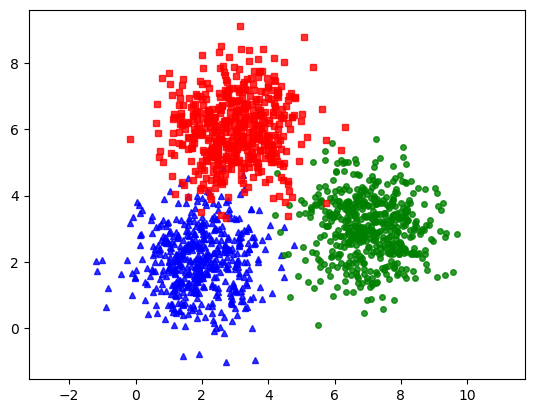

In [9]:
N, K = 500, 3
means = [[2, 2], [7, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X, original_label = generate_data(means, cov, N, K)
kmeans_display(X, original_label)

You will need to fill in the ```YOUR CODE HERE``` to finish K-means clustering algorithm

### Implementation (4 points)

In [10]:
# 0.5
def kmeans_init_centers(X, k):
    np.random.seed(seed)
    # randomly pick k rows of X as initial centers using np.random.choice function   
    # YOUR CODE HERE
    k = np.random.permutation(X.shape[0])[:k]
    return X[k]
    # raise NotImplementedError()

In [11]:
centers = kmeans_init_centers(X, K)
assert centers.shape == (K, 2)

In [12]:
# 1
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances between data and centers using cdist
    # return index of the closest center using np.argmin
    # YOUR CODE HERE
    distance = cdist(X,centers)
    res = np.argpartition(distance, 0, axis=1)[:, 0]
    return res
    # raise NotImplementedError()

In [13]:
assigned_labels = kmeans_assign_labels(X, centers)
assert assigned_labels.shape == (N*3, )

In [14]:
# 1
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        # take average
        # YOUR CODE HERE
        # raise NotImplementedError()      
        mask = (labels == k)
        x, y = X[mask, 0], X[mask, 1]     
        centers[k] = [np.average(x), np.average(y)]
    return centers

In [15]:
# 0.5
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    # YOUR CODE HERE
    thres = 0.1
    for k, _ in enumerate(centers):
        for a in range (len(centers[0])):
            if not((centers[0][a] <= new_centers[0][a] + thres) and (centers[0][a] >= new_centers[0][a] - thres)):
                return False
    return True
    #raise NotImplementedError()

In [16]:
# 1
def kmeans(X, K):
    # save the center coordinates of each iteration
    centers = [kmeans_init_centers(X, K)]  
    # save the labels of each iteration
    labels = []
    it = 0 
    while True:
        # at each iteration:
        # 1. assign label for each points and append to labels
        # 2. update the centers
        # 3. check the convergence condition
        #    and append NEW center coordinates to centers
        # 4. update iteration 
        # YOUR CODE HERE       
        labels = list(labels)
        labels = [kmeans_assign_labels(X, centers[-1])]
        labels = np.array(labels)
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it = it + 1
        # raise NotImplementedError()    
    return (centers, labels, it)

Centers found by k-means algorithm:
[[3.01050755 6.02328441]
 [7.05540657 3.02803703]
 [1.91881406 2.06239725]]


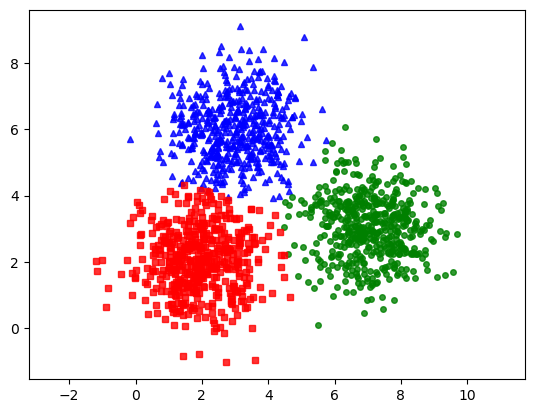

In [17]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by k-means algorithm:')
print(centers[-1])
print('='*60)
kmeans_display(X, labels[-1])

### Answer the following questions (bonus 1 point)

**Question 2:** Your comments on the result of K-means algorithm on the synthetic dataset? (0.25)

---

*Your answer here*
- The result (accuracy) of this algorithm is good because we can see clearly the result above: 3 areas of clustering is clear and independent. Furthermore, the centers found by k-means algorithm is also good, approximately 100% correct.

**Question 3:** 

- Drawbacks of K-means clustering algorithm (0.5)

- Propose solutions to the drawbacks you stated above (0.25)

---

*Your answer here*

**Drawbacks of K-means clustering algorithm:**
 
 
 - *First of all, we have to confirm the value of k at the beginning which can lead to some drawbacks later because identifying unsuitable value of K can lead to unexpected clustering result.*
 
 - *Moreover, the more number of dimensions in data that K-means has, the lower accuracy when clustering.*
 
 - *Last but not least, noise in data or ouliers can not be processed in K-means algorithm so that centers found by K-means algorithm can be changed sharply by noise or outliers. As a result, this can lead to the poor accuracy in clustering.*
 
 
 **Propose solutions to the drawbacks you stated above**
 
 - *To begin with, my team thinks that we should have an early step before applying K-means algorithms, it is **Preprocessing** step, when preprocessing and eliminate almost the noise and outliers in data, we can get a good result in this algorithm.*
 
 - *Besides that we can also use another method which is similar to the K-means algorithm but improving such as: K-Medoid or even BIRCH, DBSCAN,...*
 